## Binome

- Barry saliou
- Zhang zhile

# Practical work 4: Frequency filtering, color

In [2]:
import numpy as np
from numpy.fft import fft2,ifft2,fftshift
import matplotlib.pyplot as plt
from PIL import Image

def imshow(I,title=None,size=500):
    """ display an image with a specific size """
    plt.figure(figsize=(size//80,size//80))
    plt.gray()
    plt.imshow(I)
    if title: plt.title(title)
    plt.show()


## Exercise 1 - Frequency filtering

1. Compute than display the centered module of Fourier transform of `img/mandrill.png` (use functions seen in previous lessons). 

In [3]:
img_mandrill = np.array(Image.open('img/mandrill.png'))

In [4]:
def computeFT(I):
    """ Array -> Array[complex] """
    return fft2(I)

def toVisualizeFT(If):
    """ Array[complex] -> Array[float] """
    return np.abs(fftshift(If))

def toVisualizeLogFT(If):
    """ Array[complex] -> Array[float] """
    return np.log(1 + np.abs(fftshift(If)))

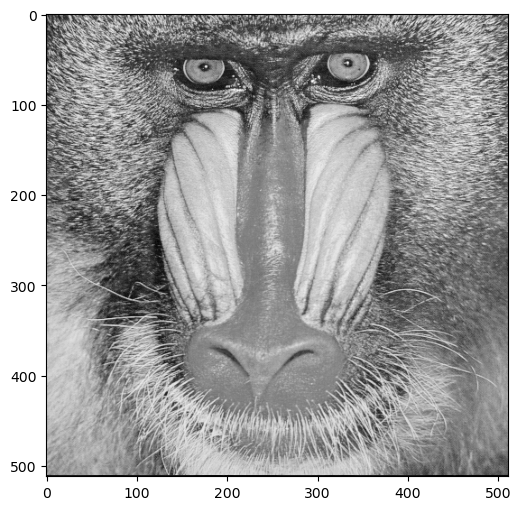

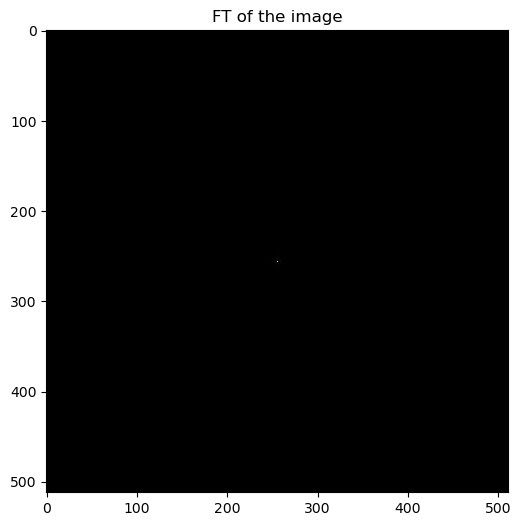

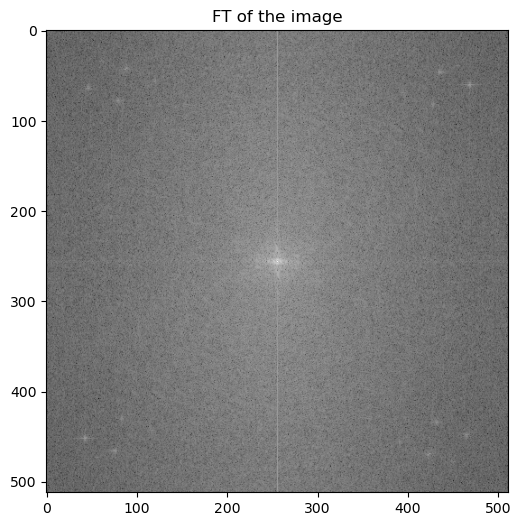

In [5]:
ft_img = computeFT(img_mandrill)
imshow(img_mandrill)
imshow(toVisualizeLogFT(ft_img),"FT of the image")

2. Write a function `idealLowPassFilter(n,m,fc)` returning an ideal low pass filter with frequency cutoff $f_c$ and size $n\times m$. Recall: this function set to 1 pixels at Euclidian distance $f_c$ from the center (null frequency).

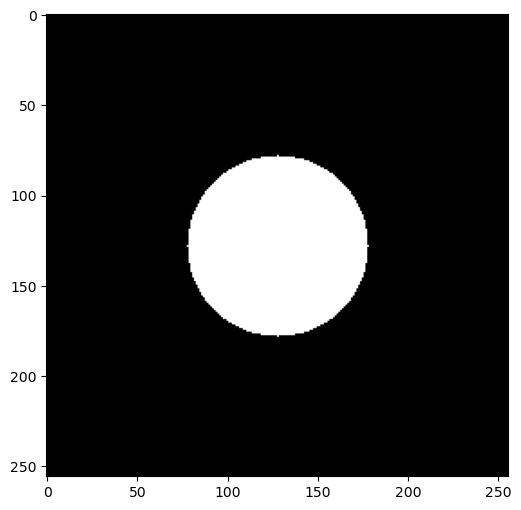

In [6]:
def idealLowPassFilter(n,m,fc):
    """ (int,int,float) -> Array[float] """
    res = np.zeros((n,m))
    for i in range(n):
        for j in range(m):
            if np.sqrt(( i - n/2 )**2 + (j - m/2 )**2 ) <= fc:
                res[i,j] = 1
    return res

imshow(idealLowPassFilter(256,256,50))

3. Write a function `lowPass(I,fc)` performing a low pass filtering of an image $I$. The function should
 - compute the centered Fourier transform of $I$
 - multiply point-by-point the spectrum with the ideal low filter produced by `idealLowPassFilter()`
 - uncenter the filtered spectrum and apply the inverse Fourier transform (use function `ifft2()` from module `numpy.fft`)
 - return the real part of filtered image

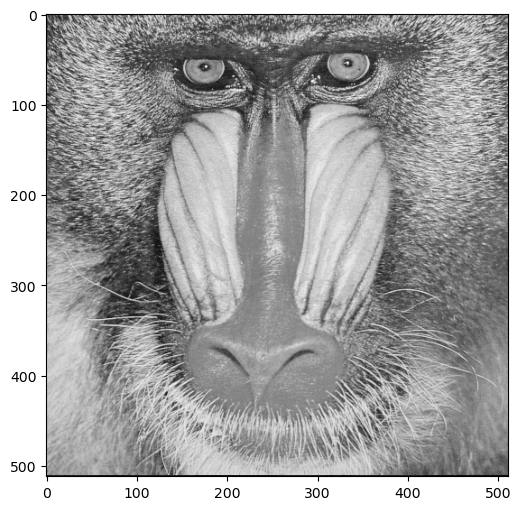

In [7]:
def lowPass(I, fc):
    # Get the dimensions of the input image
    M, N = I.shape

    # Compute the centered Fourier transform of the image
    F = computeFT(I)
    F = np.fft.fftshift(F)  # Shift the zero frequency components to the center

    # Create an ideal low-pass filter
    H = idealLowPassFilter(M, N, fc)

    # Apply the filter to the spectrum
    G = F * H

    # Uncenter the filtered spectrum
    G = np.fft.ifftshift(G)

    # Apply the inverse Fourier transform
    filtered_image = np.fft.ifft2(G)

    # Return the real part of the filtered image
    return np.real(filtered_image)
imshow(lowPass(img_mandrill,300))

4. Experiment this function on `img/mandrill.png` and `img/lena.jpg` with various values of cut off $f_c$.
 - give two effects that appears when $f_c$ decreases,
 - propose two applications of this filtering.


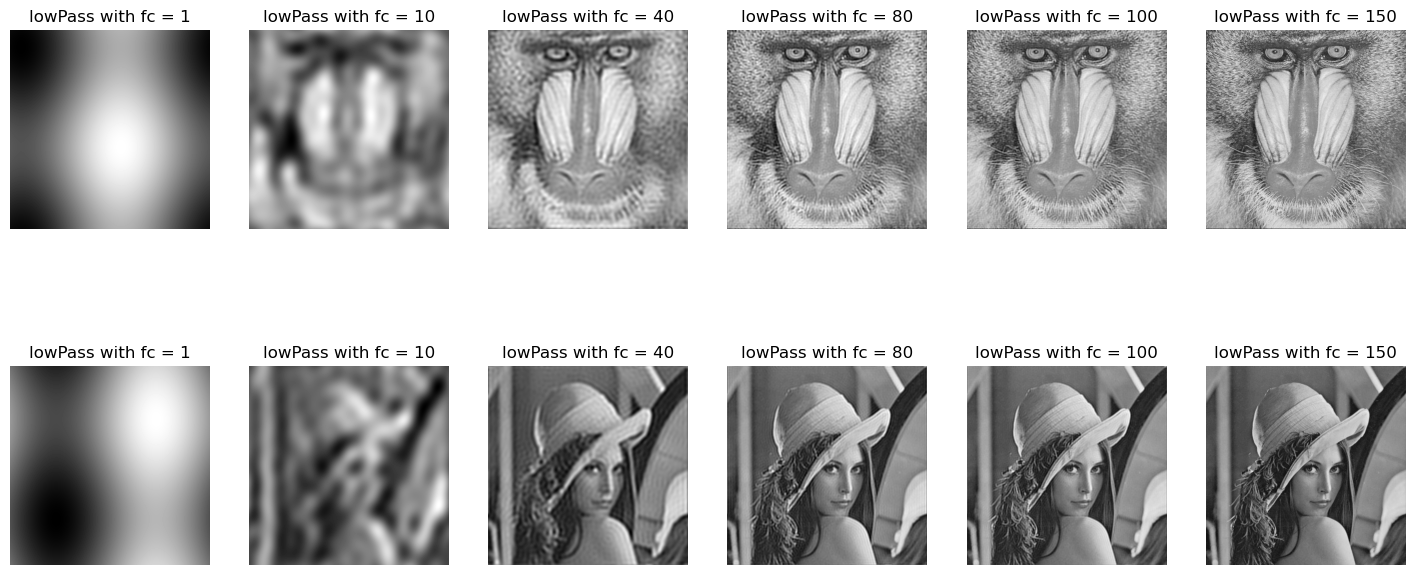

In [8]:
# Load the images
lena = np.array(Image.open("img/lena.jpg"))

fc = [1, 10, 40, 80, 100, 150]

# Create subplots
fig, axes = plt.subplots(2, len(fc), figsize=(len(fc) * 3, 8))

for i, cutoff in enumerate(fc):
    ax1 = axes[0, i]
    ax1.imshow(lowPass(img_mandrill, cutoff))
    ax1.set_title(f'lowPass with fc = {cutoff}')
    ax1.axis('off')

    ax2 = axes[1, i]
    ax2.imshow(lowPass(lena, cutoff))
    ax2.set_title(f'lowPass with fc = {cutoff}')
    ax2.axis('off')

plt.show()

<tt>
- Effects of Decreasing Cutoff Frequency (fc): <br>
 Decreasing fc smoothens and blurs the image while reducing high-frequency details.
<br>
- Applications of Low-Pass Filtering: <br>
 Image denoising and image compression are common applications 
</tt>

***

## Exercise 2 -  Linear filtering (convolution)

1. Given a kernel convolution of size $d\times d$, $d$ being odd. How many lines and columns should be added to each side of the image to apply this filter? The image is supposed surrounded by zero values.

$\frac{d-1}{2}$ rows and $\frac{d-1}{2}$ columns to each side of the image.

2. Write a function `imagePad(I,h)` getting an image and a kernel, returning a new image padded with zeros according to question 1. It is not allowed to use a module implementing the padding.

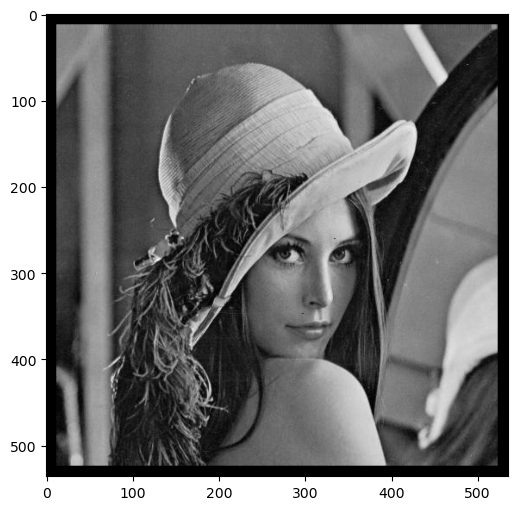

[[  0   0   0 ...   0   0   0]
 [  0 136 138 ... 125  98   0]
 [  0 137 138 ... 131 104   0]
 ...
 [  0  20  24 ...  72  76   0]
 [  0  19  25 ...  67  76   0]
 [  0   0   0 ...   0   0   0]]


In [9]:
def imagePad(I, h):

    d = h.shape[0]

    if d % 2 == 0 :
        raise ValueError("h must be odd")

    padding = (d - 1) // 2  # Padding size for each side

    # Get the dimensions of the original image
    height, width = I.shape

    # Create a new image with zeros and padding
    padded_image = np.zeros((height + 2 * padding, width + 2 * padding), dtype=I.dtype)

    # Copy the original image into the center of the padded image
    padded_image[padding:padding + height, padding:padding + width] = I.copy()

    return padded_image


imshow(imagePad(lena,np.ones((25,25))))
print(imagePad(lena, np.ones((3, 3))))

3. Write a function `conv2(I,h)` getting an image and a kernel and returning the convolution of $I$ by $h$. The function should return an image having the same shape than $I$. It is not allowed to use a module implementing the convolution.

In [10]:
def conv2(I, h):
    # Get the dimensions of the input image and the kernel
    M, N = I.shape
    
    # Pad the image
    padded_image = imagePad(I, h) 
    d = h.shape[0]  # Kernel size

    # Initialize the result image
    result = np.zeros((M, N), dtype=I.dtype)

    # Perform convolution
    for i in range(M):
        for j in range(N):
            result[i, j] = np.sum(padded_image[i:i + d, j:j + d] * h)

    return result


4. Try this function on mean filter of size $3\times3$, $5\times 5$ and $7\times 7$. Discuss the results.

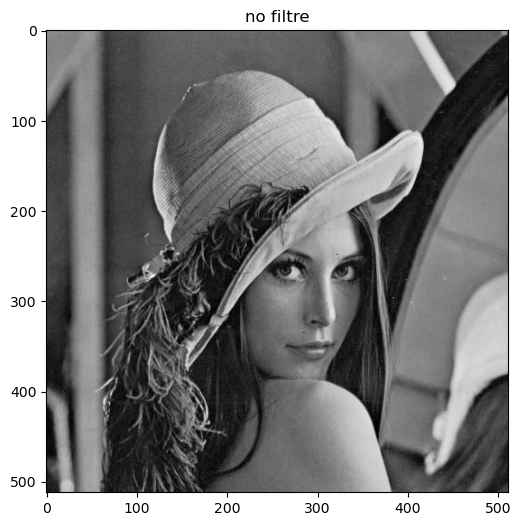

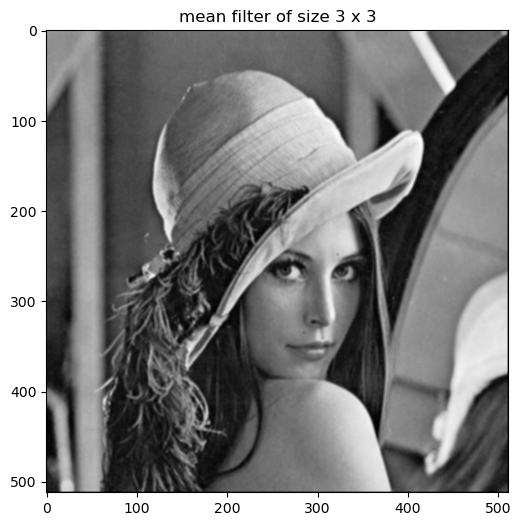

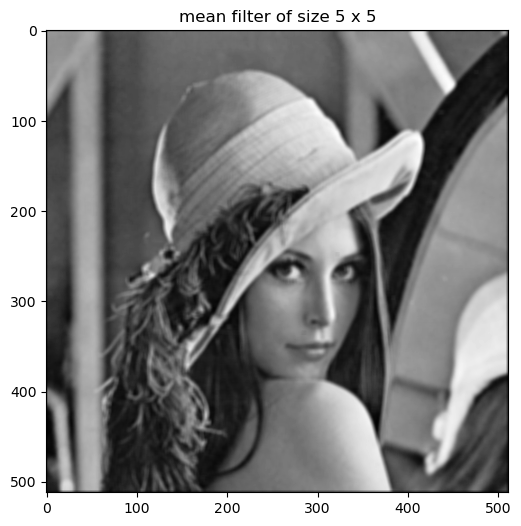

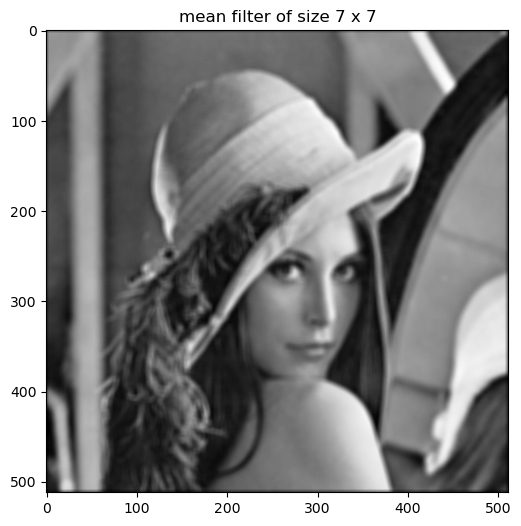

In [11]:
h_3 = (1/9) * np.ones((3, 3))
h_5 = (1/25) * np.ones((5, 5))
h_7 = (1/49) * np.ones((7, 7))

imshow(lena, "no filtre")
imshow(conv2(lena, h_3), "mean filter of size 3 x 3")
imshow(conv2(lena, h_5), "mean filter of size 5 x 5")
imshow(conv2(lena, h_7), "mean filter of size 7 x 7")

5. Display the transfert function of these mean filters. For a better visualization, use the zero-padding technique to obtain a filter with a large size (for instance $256\times 256$). Use `imshow()` and `toVisualizeLogFT()`.

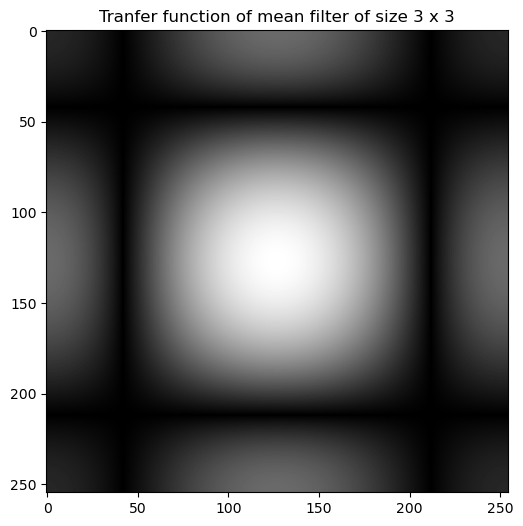

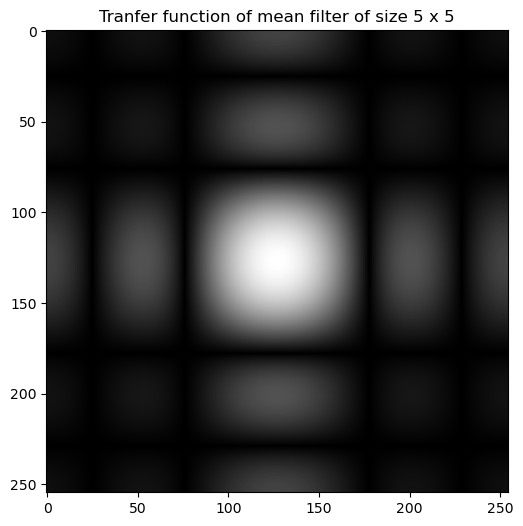

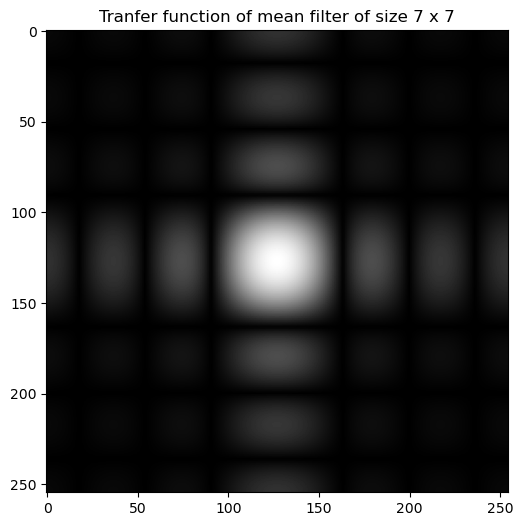

In [12]:
for filter_size in range(3, 8, 2):
    mean_filter = (1 / (filter_size ** 2)) * np.ones((filter_size, filter_size))

    # Zero-padding to create a larger filter (e.g., 256x256)
    padded_filter = imagePad(mean_filter, np.zeros((256 - filter_size, 256 - filter_size)))

    # Compute the 2D Fourier Transform
    fft_result = toVisualizeLogFT(computeFT(padded_filter))
    imshow(fft_result, "Tranfer function of mean filter of size " + str(filter_size) + " x " + str(filter_size))


6. Interpretation: what is the analytic expression of the transfert function of a mean filter? Is  it an ideal low pass filter?

<tt>
a mean filter is not an ideal low-pass filter because it does not completely eliminate all high-frequency content. It attenuates higher frequencies but allows some to pass through, making it a low-pass filter with some roll-off characteristics.
</tt>

7. Bonus question: perform the same study for the Gaussian kernel. Determine $\sigma$ in order to have filter of size $3\times3$, $5\times5$, and $7\times7$.

In [13]:
def gaussianKernel(sigma):
    """ double -> Array
        return a gaussian kernel of standard deviation sigma
    """
    n2 = int(np.ceil(3*sigma))
    x,y = np.meshgrid(np.arange(-n2,n2+1),np.arange(-n2,n2+1))
    kern = np.exp(-(x**2+y**2)/(2*sigma*sigma))
    return  kern/kern.sum()
### your answer start below


## Exercise 3: anti aliasing filtering

1. Give a code that subsamples of factor 2 (use function `subSample2()` given in TME3) the image `img/barbara.png`.

In [14]:
def subSample2(I):
    """ Array -> Array """
    return I[::2,::2]

barbara = np.array(Image.open('img/barbara.png'))

2. Give a code that subsamples of factor 2 (use function `subSample2()`) the image `img/barbara.png` after applying an low pass filter (use `antiAliasingFilter()`). As comment, recall the principle of filtering in the frequency domain.

<tt> Filtering in the frequency domain involves converting the image into its frequency representation 
using a Fourier Transform, applying a filter to the frequency components, 
and then inverse transforming it to obtain the filtered image. In the case of low-pass filtering, 
it involves removing or attenuating high-frequency components to smooth the image while preserving low-frequency information.</tt>

[Text(0.5, 1.0, 'subsampled image with anti-aliasing filter')]

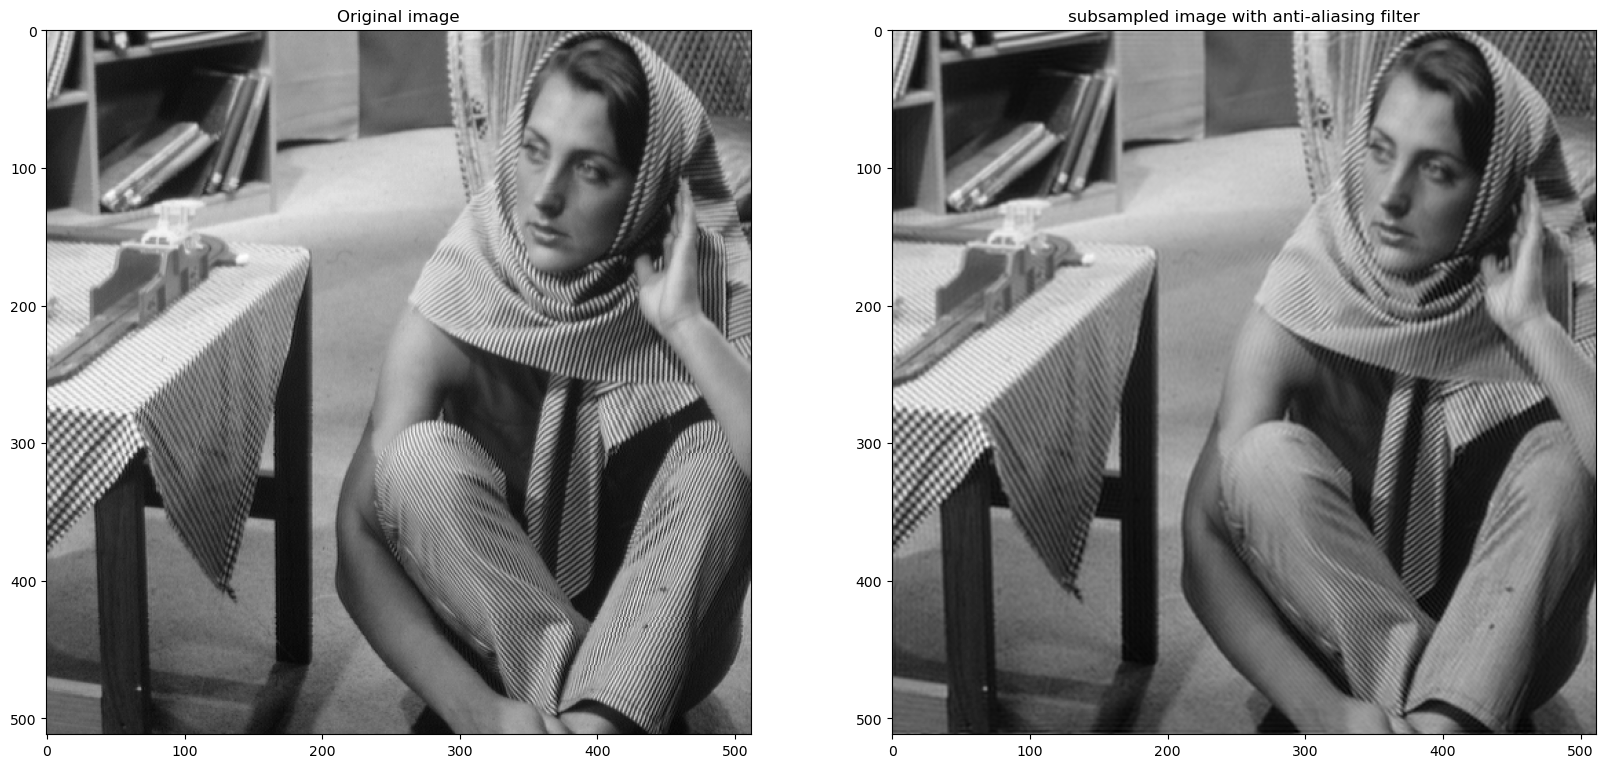

In [42]:
def antiAliasingFilter(n,m):
    """ int*int -> Array """
    n2, m2 = n//2, m//2
    rn, rm = n//4, m//4
    A = np.zeros((n, m))
    A[rn:rn+n2, rm:rm+m2] = 1
    return A  

h = antiAliasingFilter(barbara.shape[0], barbara.shape[1]) 
ft_img = computeFT(barbara) # Compute the Fourier transform of the image
ft_img = np.fft.fftshift(ft_img) # Shift the zero frequency components to the center
ft_img_filter = ft_img * h # Apply the filter to the spectrum
unshifted_ft_img_filter = np.fft.ifftshift(ft_img_filter)   # Uncenter the filtered spectrum

real_img_filter = np.real(np.fft.ifft2(unshifted_ft_img_filter)) # Apply the inverse Fourier transform and return the real part of the filtered image

sub_img_filter = subSample2(real_img_filter)    # Subsample the filtered image


fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(barbara)
ax[0].set(title="Original image")

ax[1].imshow(real_img_filter)
ax[1].set(title="subsampled image with anti-aliasing filter")


3. Describe and analyze the filtering of Barbara with and without the anti aliasing filter. What information is lost for the two filtered images ?

[Text(0.5, 1.0, 'subsampled image with anti-aliasing filter')]

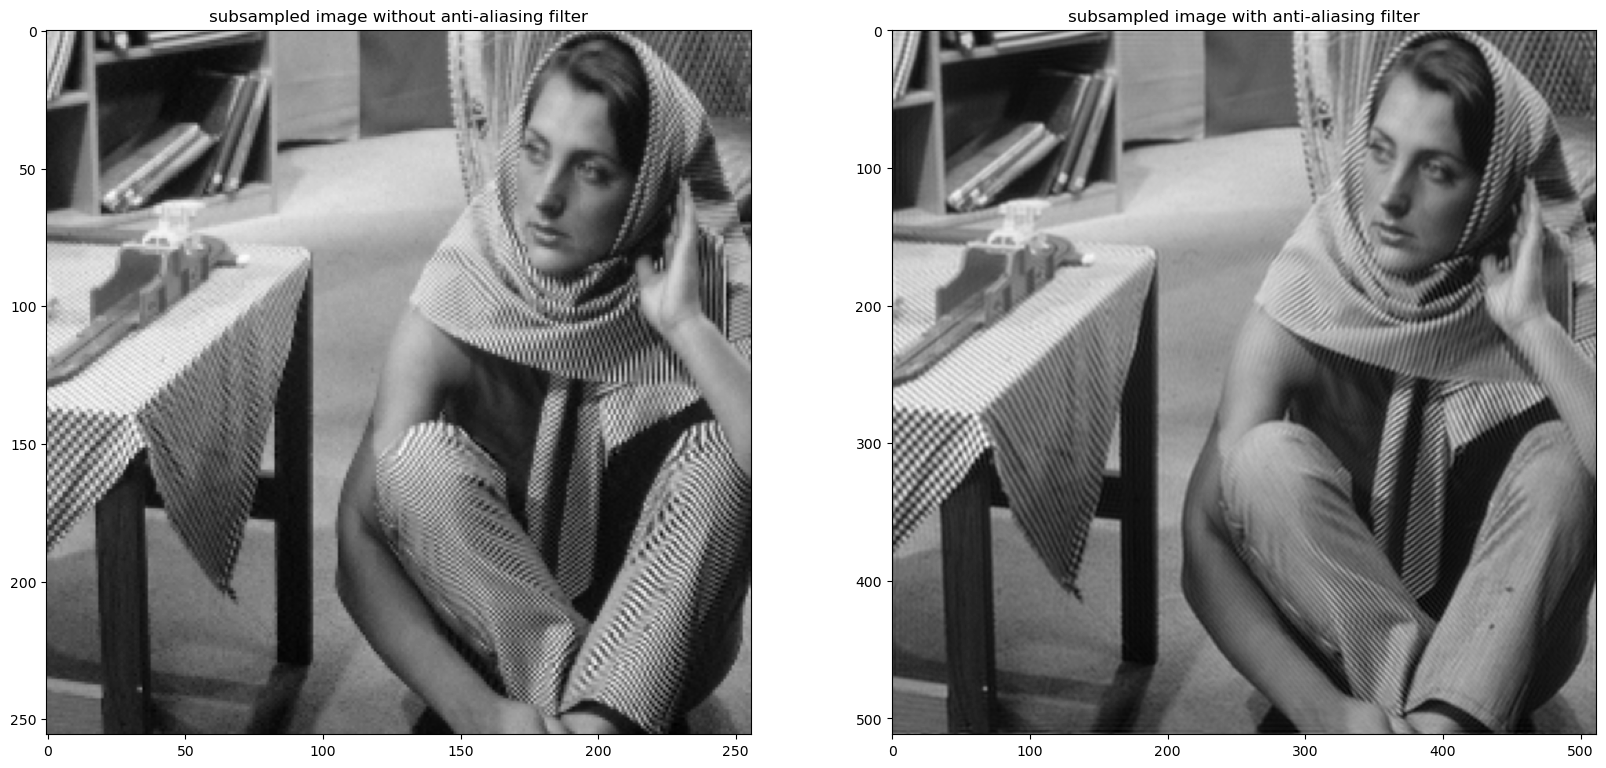

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(subSample2(barbara))
ax[0].set(title="subsampled image without anti-aliasing filter")

ax[1].imshow(real_img_filter)
ax[1].set(title="subsampled image with anti-aliasing filter")


<tt>
Without an anti-aliasing filter, we lose high-frequency details and experience aliasing artifacts. Applying an anti-aliasing filter before subsampling helps reduce aliasing and leads to a smoother, cleaner, and less detailed image. If the preservation of high-frequency details is not essential, using an anti-aliasing filter is the optimal choice to enhance the quality of the subsampled image
</tt>

***

## Exercise 4: color image
1. Read images `img/clown.bmp` and `img/clown_lumi.bmp` as two arrays named $I_1$ and $I_2$. Display these images and examine their shape. What difference there are between them?

shape of clown (512, 512, 3)
shape of clown_lumi (512, 512)


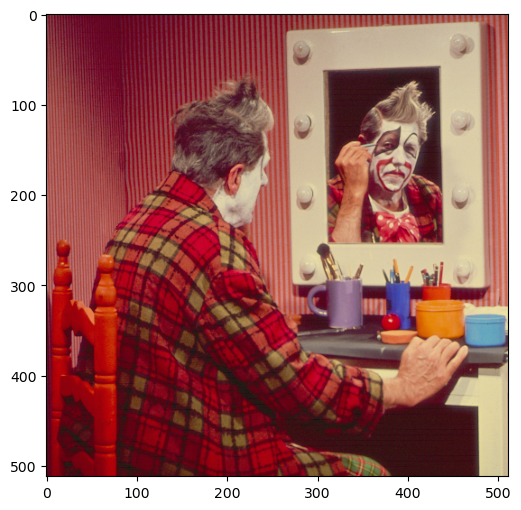

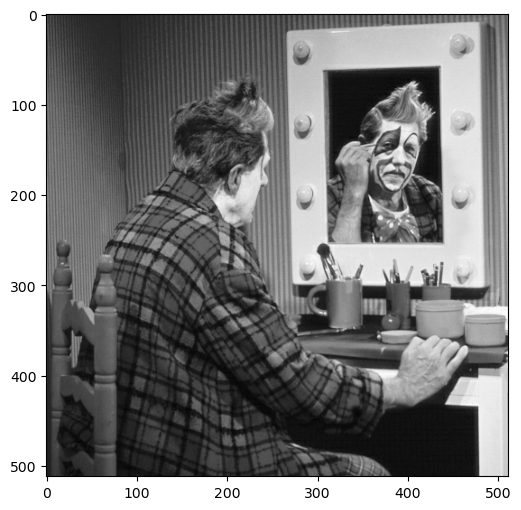

In [23]:
I1 = np.array(Image.open('img/clown.bmp'))
I2 = np.array(Image.open('img/clown_lumi.bmp'))
print("shape of clown", I1.shape)
print("shape of clown_lumi", I2.shape)
imshow(I1)
imshow(I2)

<tt>
The key difference between these two images is that 'clown.bmp' is a color image with red, green, and blue channels, while 'clown_lumi.bmp' is a grayscale image with only one channel representing luminance or brightness. The color image contains color information for each pixel, whereas the grayscale image only represents the intensity or brightness of the pixels.
</tt>

***

2. The first image is an array of dimension 3. Explain the signification of each dimension. From this image create 3 images $I_R$, $I_G$, $I_B$ of dimension 2. Display these three images and explain what you see.

<tt>
Dimension 1 corresponds to the height of the image
<br>
Dimension 2 represents the width of the image
<br>
Dimension 3  represents the color channels in the image. In our case, it contains three channels: Red, Green, and Blue (RGB). Each channel provides information about the intensity of a specific color component for each pixel in the image.
</tt>


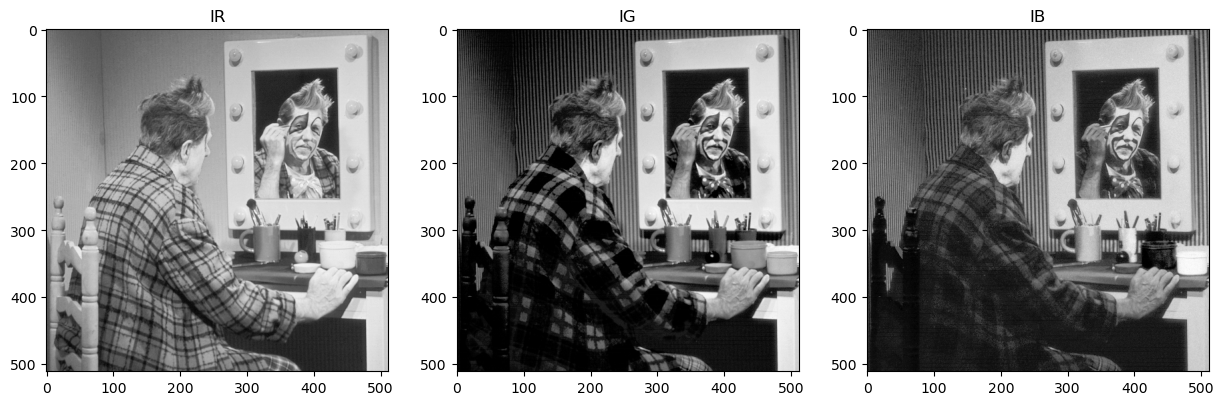

In [32]:
IR = I1[:,:,0]
IG = I1[:,:,1]
IB = I1[:,:,2]
fig, axs = plt.subplots(1, 3, figsize=(15, 15))

axs[0].set_title("IR")
axs[0].imshow(IR)

axs[1].set_title("IG")
axs[1].imshow(IG)

axs[2].set_title("IB")
axs[2].imshow(IB)



3. Create a new image $I_3$ of dimensions 3, the first dimension contains the value of $I_R$, the second the value of $I_B$ and the third the values of $I_G$. Try another combinations. Remark: color images are better handled by `imshow()` if pixel values range in $[0,1]$.

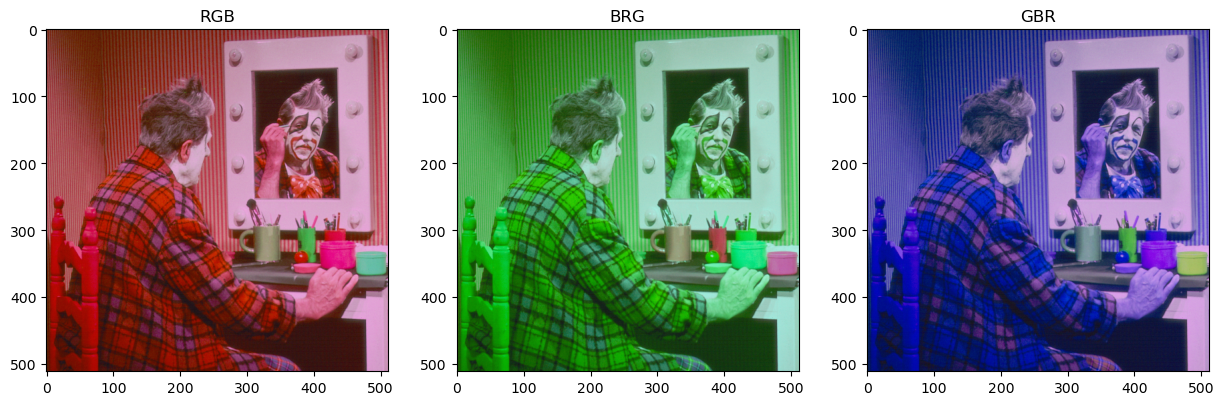

In [38]:
def combinationColors(color1, color2,color3):
    I_copy = np.zeros(I1.shape)
    I_copy[:,:,0] = color1/255
    I_copy[:,:,1] = color2/255 
    I_copy[:,:,2] = color3/255 
    
    return I_copy

fig, axs = plt.subplots(1, 3, figsize=(15, 15))

I3 = combinationColors(IR,IB,IG)
axs[0].set_title("RGB")
axs[0].imshow(I3)

I4 = combinationColors(IB,IR,IG)
axs[1].set_title("BRG")
axs[1].imshow(I4)

I5 = combinationColors(IG,IB,IR)
axs[2].set_title("GBR")
axs[2].imshow(I5)

4. Write a code that allows the see the first channel with red color scales, the second channel in green color scales, and the blue channel in blue color scales.

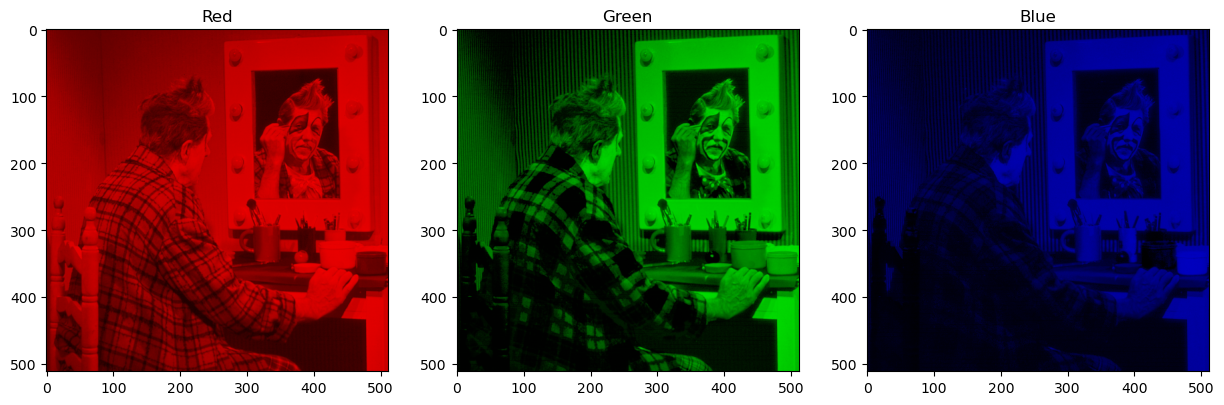

In [41]:
def channelColor(I,color_number, color): #0 is red, 1 is green, 2 is blue
    I_new = np.zeros(I.shape) # let other colors are 0 to only show one color scales
    I_new[:,:,color_number] = color/255
    return I_new

fig, axs = plt.subplots(1, 3, figsize=(15, 15))

I6 = channelColor(I1,0,IR)
axs[0].set_title("Red")
axs[0].imshow(I6)

I7 = channelColor(I1,1,IG)
axs[1].set_title("Green")
axs[1].imshow(I7)

I8 = channelColor(I1,2,IB)
axs[2].set_title("Blue")
axs[2].imshow(I8)